__读取数据__

In [ ]:
import rasterio
from matplotlib import pyplot as plt
import numpy as np

# 打开ENVI格式的遥感数据文件
with rasterio.open("D:\ToolsRoming\py\sample.dat") as src:
    # 读取第2、3、4波段的数据
    band1 = src.read(1)  # 假设1是第二个波段
    band2 = src.read(2)  # 假设2是第三个波段
    band3 = src.read(3)  # 假设3是第四个波段

    # 将数据融合为RGB图像
    # 注意：这里需要确保所有波段的数据形状相同
    # 将第4波段作为红色，第3波段作为绿色通道，第2波段作为蓝色
    rgb_image = np.dstack((band3, band2, band1))

# 使用matplotlib展示RGB图像
plt.imshow(rgb_image)
plt.show()

__NDVI__

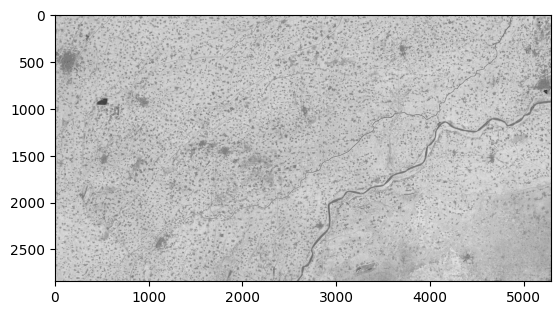

<Axes: >

In [4]:
import numpy as np
import rasterio
from rasterio.plot import show

# 打开ENVI格式的遥感数据文件
with rasterio.open("D:\ToolsRoming\py\sample.dat") as src:
    # 读取近红外和红色波段的数据
    # 确保这里的波段索引与你的数据匹配
    nir_band = src.read(4).astype(np.float16)  # 第四波段，近红外波段
    red_band = src.read(3).astype(np.float16)   # 第三波段，红色波段

    # 计算NDVI
    # 避免除以零，给分母加一个小的常数
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    #binary_data = np.where(ndvi > 0, 1, 0)  

# 显示NDVI图像
show(ndvi, cmap='gray')  # 使用适合NDVI的色图

__NDBI__

In [ ]:
import numpy as np
import rasterio
from rasterio.plot import show

# 打开ENVI格式的遥感数据文件
with rasterio.open("D:\ToolsRoming\py\sample.dat") as src:
    # 读取近红外和红色波段的数据
    # 确保这里的波段索引与你的数据匹配
    nir_band = src.read(4).astype(np.float16)   # 第四波段，近红外
    swir_band = src.read(5).astype(np.float16)  # 第五波段，短波

    # 计算NDVI
    # ndbi = (nir_band - swir_band) / (nir_band + swir_band)
    ndbi = (swir_band - nir_band) / (swir_band + nir_band)

# 显示NDVI图像
show(ndbi, cmap='gray')  # 使用适合NDVI的色图

__MNDWI__

In [ ]:
import numpy as np
import rasterio
from rasterio.plot import show

# 打开ENVI格式的遥感数据文件
with rasterio.open("D:\ToolsRoming\py\sample.dat") as src:
    # 读取近红外和红色波段的数据
    # 确保这里的波段索引与你的数据匹配
    green_band = src.read(2).astype(np.float16)  # 第五波段，短波
    swir_band = src.read(5).astype(np.float16)   # 第四波段，近红外

    # 计算NDVI
    # 避免除以零，给分母加一个小的常数
    mndwi = (green_band - swir_band) / (green_band + swir_band)

# 显示NDVI图像
show(mndwi, cmap='gray')  # 使用适合NDVI的色图

__显示图像的窗体__

In [ ]:
import tkinter as tk
from tkinter import messagebox
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import rasterio

# 假设 mndwi 是一个已经计算好的 NumPy 数组
# mndwi = ...

def show_image_in_gui(image_data, title="Image"):
    # 创建一个 tkinter 窗体
    root = tk.Tk()
    root.title(title)

    # 创建一个 Matplotlib 图像
    fig = Figure(figsize=(10, 8))  # 可以根据需要调整图像大小
    ax = fig.add_subplot(111)
    cax = ax.imshow(image_data, cmap='gray', vmin=image_data.min(), vmax=image_data.max())
    fig.colorbar(cax)

    # 将 Matplotlib 图像嵌入到 tkinter 窗体中
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # 定义关闭窗体时的回调函数
    def on_closing():
        print('Window is closing...')
        root.destroy()

    # 绑定关闭事件
    root.protocol("WM_DELETE_WINDOW", on_closing)

    # 显示窗体
    root.mainloop()


__创建窗体__

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
import numpy as np
import rasterio
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


def create_main_window():
    def open_file_dialog():
        filepath = filedialog.askopenfilename()
        if filepath:
            entry_var.set(filepath)
            status_label.config(text="文件已选择: " + filepath)

    def calculate_ndvi():
        pass

    def calculate_ndbi(text):
        show_status(text)

    def calculate_mndwi():
        pass

    def show_image(image_data):
        # 创建一个 Matplotlib 图像并显示
        fig = Figure(figsize=(5, 4))
        ax = fig.add_subplot(111)
        # 这里添加显示图像的代码，例如：``
        # ax.imshow(image_data, cmap='gray')
        canvas = FigureCanvasTkAgg(fig, master=main_window)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def show_status(message):
        status_label.config(text=message)

    # 创建主窗体
    main_window = tk.Tk()
    main_window.title("遥感图像处理")

    # 创建文本框变量
    entry_var = tk.StringVar()

    # 创建文本框和按钮，并使用grid布局管理器放置它们
    entry = tk.Entry(main_window, textvariable=entry_var, width=50)
    entry.grid(row=0, column=0, padx=5, pady=5, sticky='ew')
    browse_button = tk.Button(
        main_window, text="选择输入文件", command=open_file_dialog)
    browse_button.grid(row=0, column=1, padx=5, pady=5)

    # 创建一个Frame来放置四个按钮
    button_frame = tk.Frame(main_window)
    # 布局Frame，使其在窗体中占据适当的空间
    button_frame.grid(row=1, column=0, columnspan=2, pady=5)

    # 为按钮创建并设置统一的尺寸和布局
    button_width = 12  # 设置按钮宽度
    calculate_ndvi_button = tk.Button(
        button_frame, text="NDVI计算", command=calculate_ndvi, width=button_width)
    calculate_ndvi_button.pack(side=tk.LEFT, padx=2)

    calculate_ndbi_button = tk.Button(
        button_frame, text="NDBI计算", command=lambda: calculate_ndbi("hello"), width=button_width)
    calculate_ndbi_button.pack(side=tk.LEFT, padx=2)

    calculate_mndwi_button = tk.Button(
        button_frame, text="MNDWI计算", command=calculate_mndwi, width=button_width)
    calculate_mndwi_button.pack(side=tk.LEFT, padx=2)

    show_image_button = tk.Button(
        button_frame, text="显示图像", command=show_image, width=button_width)
    show_image_button.pack(side=tk.LEFT, padx=2)

    # 创建状态标签
    status_label = tk.Label(main_window, text="")
    status_label.grid(row=2, column=0, columnspan=2, pady=5)

    return main_window


# 调用函数创建窗体
if __name__ == "__main__":
    main_window = create_main_window()
    main_window.mainloop()

__代码测试__

In [ ]:
def band_math1(b1, b2):
    output = (b1 - b2) / (b1 + b2 + 0.00000001)
    return output

In [ ]:
def calculate_ndvi():  # 按钮事件：NDVI计算
    # 初始化变量
    global band_group
    global output_photo
    output_photo = None
    # 运算
    band1 = band_group[4]
    band2 = band_group[3]
    print(type(band1),type(band2))
    try:
        output_photo = band_math1(b1=band1, b2=band2)
        #status_label.config(text="NDVI运算完成")
        return
    except Exception as e:
        messagebox.showerror("Unknown Error", e)
        #status_label.config(text="出现未知错误") 

In [ ]:
def open_envi(file_path=""):
    if file_path == "":
        return -1
    if not os.path.isfile(file_path):
        return -1
    band_index = 0
    with rasterio.open(file_path) as file:
        while True:
            band_index += 1
            try:
                band_group.append(file.read(band_index))
            except IndexError:
                break
    return band_group

In [ ]:
band_group=[]
band_group = open_envi("D:\ToolsRoming\py\sample.dat")
calculate_ndvi()
show(output_photo,cmap = 'gray')